In [ ]:
# lungcap, insurance, property price dataset model build

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lc  = pd.read_csv("./Practice/datasets/LungCapData.csv")

In [ ]:
lc.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [ ]:
lc.shape

(725, 6)

In [ ]:
lc.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
lc.Smoke = le.fit_transform(lc.Smoke)
lc.Gender = le.fit_transform(lc.Gender)
lc.Caesarean = le.fit_transform(lc.Caesarean)

In [ ]:
lc.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [ ]:
lc.corr()

,LungCap,Age,Height,Smoke,Gender,Caesarean
LungCap,1.000000,0.819675,0.912187,0.101374,0.169823,0.021317
Age,0.819675,1.000000,0.835737,0.211232,-0.030312,0.056339
Height,0.912187,0.835737,1.000000,0.176534,0.141441,0.060397
Smoke,0.101374,0.211232,0.176534,1.000000,-0.053528,0.038330
Gender,0.169823,-0.030312,0.141441,-0.053528,1.000000,0.013070
Caesarean,0.021317,0.056339,0.060397,0.038330,0.013070,1.000000


In [ ]:
# sampling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
lc_train, lc_test = train_test_split(lc, test_size = 0.2)

In [ ]:
lc_train_x = lc_train.iloc[:, 1:6]
lc_train_y = lc_train.iloc[:, 0]

In [ ]:
lc_test_x = lc_test.iloc[:, 1:6]
lc_test_y = lc_test.iloc[:, 0]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg =LinearRegression()

In [ ]:
linreg.fit(lc_train_x,lc_train_y)

LinearRegression()

In [ ]:
linreg.intercept_

-11.307780142050124

In [ ]:
linreg.coef_

array([ 0.16337116,  0.26303903, -0.5821169 ,  0.42375048, -0.19580575])

In [ ]:
Rsquare = linreg.score(lc_train_x,lc_train_y)
Rsquare

0.8562840821900217

In [ ]:
N = lc_train_x.shape[0]
K = lc_train_x.shape[1]

In [ ]:
AdjRsquare = 1- (1 - Rsquare*(N-1)/(N-K-1))
AdjRsquare

0.8637430027665899

In [ ]:
pred_train  =linreg.predict(lc_train_x)
pred_test  =linreg.predict(lc_test_x)

In [ ]:
error_train = lc_train_y - pred_train
error_train

205    1.423723
183   -1.638052
233    0.097687
484    1.415462
253    1.680098
         ...   
3      1.046062
144   -0.398419
168   -0.871034
91    -0.458075
620    0.008007
Name: LungCap, Length: 580, dtype: float64

In [ ]:
error_test = lc_test_y - pred_test
error_test

566    0.213280
586    1.534509
235   -0.854814
45    -0.255546
29     0.485406
         ...   
417    0.287081
719   -0.700798
215    0.123737
581    0.486524
444   -0.923787
Name: LungCap, Length: 145, dtype: float64

In [ ]:
# while checking the assumption what all things we do???
# mean of error term must be zero

In [ ]:
np.mean(error_train)

-1.2220109981391378e-15

C:\Users\onkar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LungCap', ylabel='Density'>

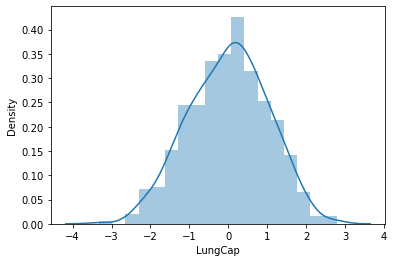

In [ ]:
sns.distplot(error_train)

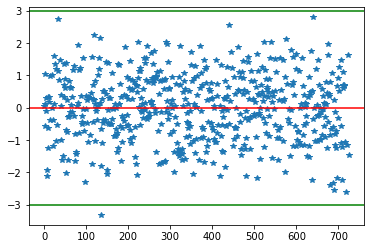

In [ ]:
plt.plot(error_train, '*')
plt.axhline(y= np.mean(error_train), color = 'r')
plt.axhline(y = 3, color='g')
plt.axhline(y =-3, color='g')

In [ ]:
pred_actual = pd.DataFrame({"Predicted":pred_train, "Actual":lc_train_y})

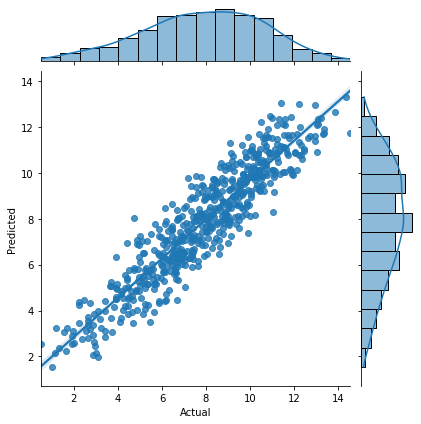

In [ ]:
sns.jointplot(x= 'Actual', y = 'Predicted', data=pred_actual, kind='reg')

In [ ]:
def remove_outliers(df, col , k=2):
    mean= df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if(x > mean - k*sd)]
    final_list = [x for x in final_list if(x < mean + k*sd)]
    df1 = df.loc[df[col].isin(final_list)];print(df1.shape)
    print("No of outliers removed ==>", df.shape[0] -df1.shape[0])

In [ ]:
remove_outliers(lc, 'LungCap',2)
df1 = lc

(695, 6)
No of outliers removed ==> 30


In [ ]:
# MSE,RMSE, MAPE, on test data

In [ ]:
mse_test = np.mean(np.square(error_test))
mse_test

1.0208985373352475

In [ ]:
rmse_test = np.sqrt(mse_test)
rmse_test

1.0103952381792223

In [ ]:
mape_test = np.mean(np.abs(error_test*100/lc_test_y))
mape_test

12.78463595674877

In [ ]:
Accuracy = 100- mape_test
Accuracy

87.21536404325123